# Notebook setup

**Don't forget to change the path in this cell so that Python can find the datasets for this week.**

In [33]:
# CHANGE THIS TO POINT TO YOUR WEEK 12 DATA FOLDER.
data_folder = r'C:\Users\dwmcclellan\OneDrive - Fort Lewis College\0-Fall 2021\GEOG-315\Lab-12\data'

In [34]:
import os

# Change the Python working directory.
os.chdir(data_folder)

# An Introduction to matplotlib

The core plotting library in Python is [matplotlib](http://matplotlib.org/). There are other modules that allow to make prettier plots with less work, but matplotlib is *everywhere* (including installed with ArcGIS (both ArcMap and ArcPro). Many of these other modules use matplotlib in the background, but they take care of some of the heavy lifting for you, which is why it takes less work to use them. Because matplotlib is the one that comes with ArcGIS, it's the one we're going to look at here. 

I don't think this notebook qualifies as even scratching the surface of what's possible, but it you're interested in learning more, the [matplotlib gallery](http://matplotlib.org/gallery.html) is a great place to start. Just look for a plot with the basic style that you're looking for and click on the image to see the code that generated it.

You might notice that stuff gets printed out along with the plots; this is because the functions actually return data that you can modify. If you don't want that stuff to print, you can capture it in a variable, but it's fine if it prints out.

There are several parts of the `matplotlib` package, but the one used for plotting is called `pyplot`. It's convention to rename it as `plt` when you import it.

You'll usually want to put the data that you want to plot into numpy arrays (you used those briefly when we were plotting rasters), so we also need to import numpy. Again, we'll follow convention and rename it to `np`.

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Set up matplotlib to draw in the notebook.
%matplotlib inline

## Basic plots

Remember plotting on x-y axes from math class? We'll be doing the same thing with `matplotlib`. You can pass lists of x and y coordinates to `plt.plot()` in order to draw something. The next cell draws a simple line where the coordinates look like this:

```
(0, 0)
(1, 1)
(2, 2)
(3, 3)
(4, 4)
```

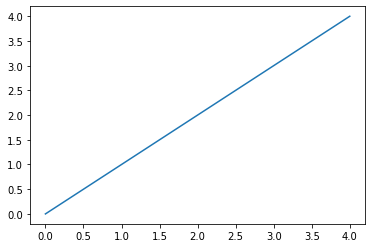

In [36]:
plt.plot(range(5), range(5))

Let's try drawing some points that were randomly generated around a line. First create a list of `x` values from 0 to 19 using the `range()` function, which you've seen a lot by now.

In [37]:
x = np.array(range(20))
print(x)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


Now plug that list into the equation `y = 0.5x + 3`. This will create an array of `y` values.

In [38]:
y = 0.5 * x + 3
print(y)

[ 3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   9.5
 10.  10.5 11.  11.5 12.  12.5]


We can plot those as individual dots instead of turning them into a line by adding another parameter to `plot()` for symbology. The `'o'`, tells it to draw points (that's a small letter o, not a zero):

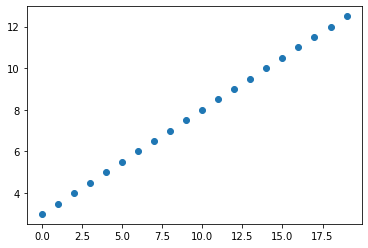

In [39]:
plt.plot(x, y, 'o')

Again, if you don't want the matplotlib object to print out along with your plot, you can just send it to a variable. Like this:

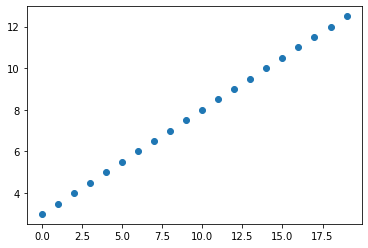

In [40]:
# don't print the <matplotlib object> out along with the plot
my_plot = plt.plot(x, y, 'o')

But we want to add some randomness, so let's generate a list of 20 random numbers from the standard normal distribution:

In [41]:
r = np.random.randn(20)
print(r)

[ 0.13008992  0.83774775 -0.66371431 -0.31116112 -0.02380044  0.67721584
 -0.0679785  -0.16117279  0.45830728 -2.29484373  2.07924179 -1.42670046
 -1.4695918  -1.33075361  0.76994872 -0.83557882 -0.97084665 -0.84573199
 -0.53371084 -1.6416126 ]


Now we can add those values to the `y` values to get points centered around the line, but not exactly on it.

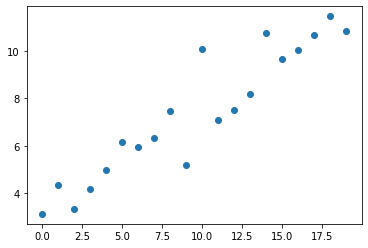

In [42]:
plt.plot(x, y + r, 'o')

Now let's add a line to the plot. To draw a line instead of dots, use `'-'` instead of `'o'`. You can also specify colors, where `'b'` means blue and `'r'` means red. So `'r-'` means draw a red line. If the plotting commands are in the same cell, it'll just keep drawing on top of the existing plot. See [here](https://matplotlib.org/stable/tutorials/colors/colors.html) for a list of possible colors.

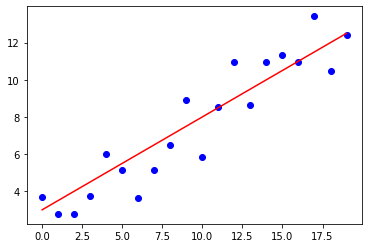

In [13]:
# Draw the points with randomness added in, using blue circles (bo).
plt.plot(x, y + r, 'bo')

# Draw the line using the real coordinates, using a red line (r-).
plt.plot(x, y, 'r-')

You can plot multiple x,y series at once by passing more arrays and symbol descriptors, so you can combine the last two plot requests into one. The syntax looks like

```python
plt.plot(x1, y1, sym1, x2, y2, sym2, ...)
```

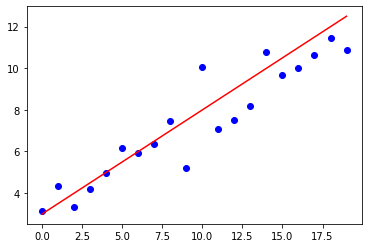

In [43]:
plt.plot(x, y + r, 'bo', x, y, 'r-')

### Problem 1

Make a plot with the same dots and line as the previous plot, but make the dots green stars and the line black and dashed. See [here](https://matplotlib.org/stable/api/markers_api.html) for lists of possible symbols.

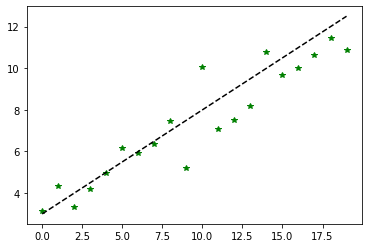

In [44]:
plt.plot(x, y + r, 'g*', x, y, 'k--')

## Histograms

Histograms are made using the `hist()` function. This first example provides the data to graph and the number of bins that it should divide the data up into for the plot.

(array([ 2.,  2.,  4.,  7.,  8., 27., 30., 31., 64., 64., 61., 58., 49.,
        43., 20., 15., 10.,  2.,  2.,  1.]),
 array([ 96.87006906,  97.18615662,  97.50224418,  97.81833173,
         98.13441929,  98.45050685,  98.76659441,  99.08268197,
         99.39876953,  99.71485708, 100.03094464, 100.3470322 ,
        100.66311976, 100.97920732, 101.29529488, 101.61138243,
        101.92746999, 102.24355755, 102.55964511, 102.87573267,
        103.19182023]),
 <BarContainer object of 20 artists>)

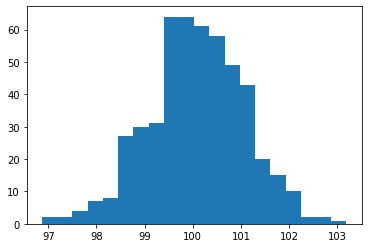

In [48]:
# Generate 500 random numbers from a normal distribution.
# Make them bigger by adding 100.
data = 100 + np.random.randn(500)

# Make a histogram with 20 bins.
plt.hist(data, 20)

The `hist()` function actually returns 3 things:
1. An array of counts for each bin
2. An array of bin edges
3. An array of graphics objects, called patches

That's what all that stuff was that printed out before the plot. You can capture these data in variables and they don't print in the notebook, and even better, you can use them later if you need to:

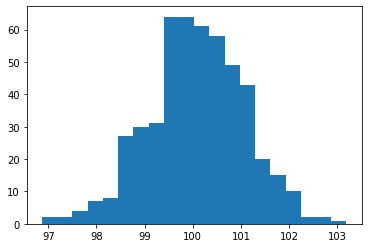

In [49]:
counts, bins, patches = plt.hist(data, 20)

For example, say you wanted to change the color of the tallest bar. You can use `argmax()` to get the offset of the maximum value in a numpy array, so let's get the offset of the maximum value in the `counts` array (this corresponds to the tallest bar in the histogram, since the definition of a histogram is that it shows counts, right?).

In [50]:
max_index = np.argmax(counts)
print(max_index)

8


Now you can change the color of that bar when it's plotted.

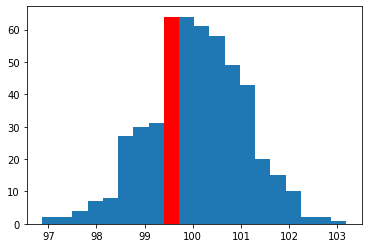

In [51]:
# Get the histogram results.
counts, bins, patches = plt.hist(data, 20)

# Get the index of the tallest bar.
max_index = np.argmax(counts)

# Turn the patch (bar) at that index to red.
patches[max_index].set_facecolor('r')

### Problem 2

Make a histogram of the same data we've been using for histograms, but with only 10 bins.

(array([  7.,  19.,  45.,  72., 124., 117.,  74.,  34.,   3.,   5.]),
 array([ 96.99162737,  97.61255862,  98.23348988,  98.85442114,
         99.4753524 , 100.09628366, 100.71721492, 101.33814618,
        101.95907744, 102.5800087 , 103.20093996]),
 <BarContainer object of 10 artists>)

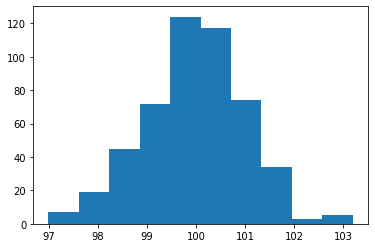

In [52]:
# Generate 500 random numbers from a normal distribution.
# Make them bigger by adding 100.
data = 100 + np.random.randn(500)

# Make a histogram with 10 bins.
plt.hist(data, 10)

## Plot labels

You can add a title and axis labels using the `title()`, `xlabel()` and `ylabel()` functions.

Text(0, 0.5, 'Number of Individuals')

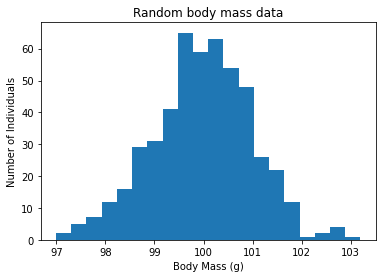

In [53]:
# Make the histogram.
counts, bins, patches = plt.hist(data, 20)

# Add a plot title.
plt.title('Random body mass data')

# Add x and y axis labels.
plt.xlabel('Body Mass (g)')
plt.ylabel('Number of Individuals')

## Axis Limits

You can change all axis limits with the `axis([xmin, xmax, ymin, ymax])` function, or just the x or y limits with `xlim(min, max)` and `ylim(min, max)`.

(90.0, 110.0, 0.0, 100.0)

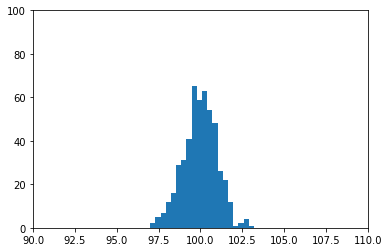

In [54]:
# Make the histogram.
counts, bins, patches = plt.hist(data, 20)

# Make the x-axis go from 90 to 110, and the y-axis go from 0 to 100.
plt.axis([90, 110, 0, 100])

# This is a longer way to set the same limits. You could use one of these functions if you only wanted to change x or y.
# plt.xlim(90, 110)
# plt.ylim(0, 100)

## Subplots

You can have multiple plots per figure. These subplots are generated using `subplot(num_rows, num_cols, position)`, where `num_rows` and `num_cols` describe how many rows and columns of subplots you want. `position` is the subplot you want to work with, where the upper left is 1 and the numbers increase left to right and top to bottom. So if you had a plot with two rows and three columns, the subplots would be numbered like this:

-    | col1 | col2 | col3  
---- | ---- | ---- | ----
row1 | 1    | 2    | 3
row2 | 4    | 5    | 6

And to get the subplot in the lower left corner, you'd use

```python
subplot(2, 3, 4)
```

That says there are 2 rows, 3 columns, and you want the subplot in position 4.

Here's an example with one row and two columns (so two subplots side-by-side):

(array([  7.,  24.,  43.,  88., 112., 111.,  56.,  43.,  12.,   4.]),
 array([ 97.28877986,  97.86550014,  98.44222042,  99.0189407 ,
         99.59566098, 100.17238126, 100.74910154, 101.32582182,
        101.9025421 , 102.47926239, 103.05598267]),
 <BarContainer object of 10 artists>)

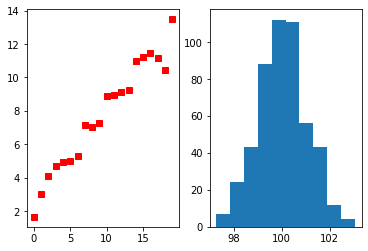

In [55]:
# Create some random data.
x = np.array(range(20))
y = 3 + 0.5 * x + np.random.randn(20)
data = 100 + np.random.randn(500)

# Generate 2 subplots (1 row, 2 columns) and select
# the first one. Then plot y vs x.
plt.subplot(1, 2, 1)
plt.plot(x, y, 'rs')

# Using the same set of subplots, select the second
# one and make a histogram of the data variable.
plt.subplot(1, 2, 2)
plt.hist(data, 10)

### Problem 3

Here's the code from the last example, but with some extra random data generated and put in the `z` variable. Change the plot so that it makes 3 subplots, and plot `z` vs `x` in the third plot (this means `z` on the y-axis and `x` on the x-axis). Use blue diamonds for the symbols in the last plot.

(array([  2.,   1.,   9.,  28.,  73., 140., 133.,  72.,  37.,   5.]),
 array([ 95.53736982,  96.26649059,  96.99561136,  97.72473213,
         98.4538529 ,  99.18297367,  99.91209444, 100.64121521,
        101.37033598, 102.09945675, 102.82857752]),
 <BarContainer object of 10 artists>)

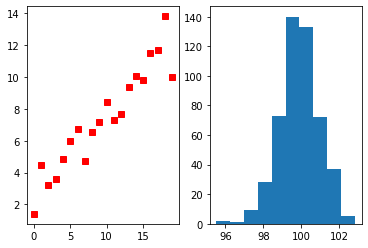

In [56]:
# Create some random data.
x = np.array(range(20))
y = 3 + 0.5 * x + np.random.randn(20)
z = 2 + 0.9 * x + np.random.randn(20)
data = 100 + np.random.randn(500)

# Generate 2 subplots (1 row, 2 columns) and select
# the first one. Then plot y vs x.
plt.subplot(1, 2, 1)
plt.plot(x, y, 'rs')

# Using the same set of subplots, select the second
# one and make a histogram of the data variable.
plt.subplot(1, 2, 2)
plt.hist(data, 10)

## Saving figures

You can save a graphic with `savefig()`. Check out the `plot.png` and `plot.pdf` files this creates in your data folder. Try opening the PNG in both Windows Photo Viewer and Paint so you can see the effect of the transparent background. At least on my computer, the Photo Viewer background is black, so the black text in the figure isn't visible.

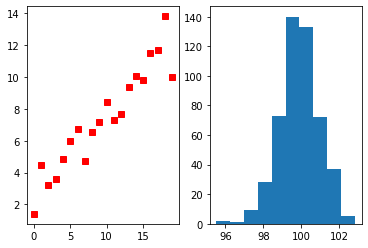

In [57]:
# Make the first subplot.
plt.subplot(1, 2, 1)
plt.plot(x, y, 'rs')

# Make the second subplot.
plt.subplot(1, 2, 2)
plt.hist(data, 10)

# Save the figure as a PNG with a transparent background.
plt.savefig('plot.png', transparent=True)

# Save the figure as a PDF.
plt.savefig('plot.pdf')

## New Figures

Obviously we've been creating new figures each time we run a cell in the notebook, but creating multiple figures in the same .py script requires that you create new figures, which is done using `figure()`. This creates separate figures rather than subplots of a single figure. To prove it, this example saves the figure at the end. The output will only include the second figure.

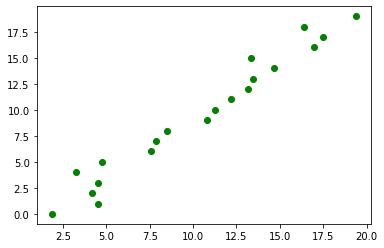

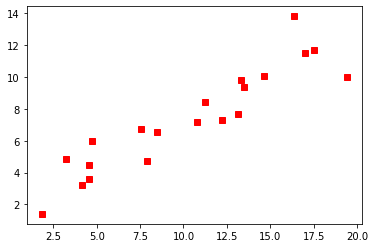

In [58]:
# Make the first plot.
plt.plot(z, x, 'go')

# Make a new figure, plot stuff on it,
# and save it.
plt.figure()
plt.plot(z, y, 'rs')
plt.savefig('plot2.png')

Go look at `plot2.png` in your data folder and see what it contains. It will only have the second plot, because the first one was part of a different figure.

## Figure size

You can specify a figure size when you use `figure()`, so you can use this to make your plot bigger even when you don't need multiple figures. Let's increase the size of the last `subplot()` example.

(array([  2.,   1.,   9.,  28.,  73., 140., 133.,  72.,  37.,   5.]),
 array([ 95.53736982,  96.26649059,  96.99561136,  97.72473213,
         98.4538529 ,  99.18297367,  99.91209444, 100.64121521,
        101.37033598, 102.09945675, 102.82857752]),
 <BarContainer object of 10 artists>)

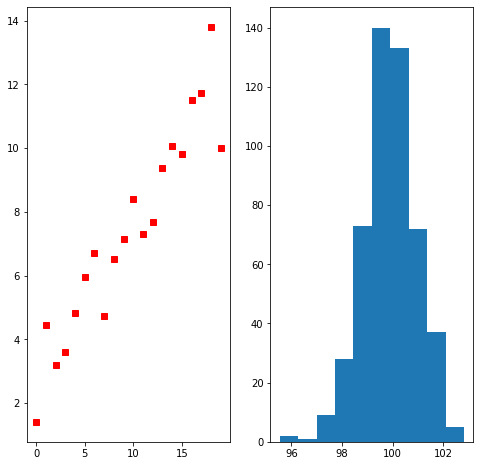

In [59]:
# Make a new figure that's 8x8 inches.
plt.figure(figsize=(8,8))

# Make the first subplot.
plt.subplot(1, 2, 1)
plt.plot(x, y, 'rs')

# Make the second subplot.
plt.subplot(1, 2, 2)
plt.hist(data, 10)

Another way to accomplish that would've been to use the `subplots()` function (notice the 's' on the end). This returns a figure and a list of *axes*, one for each subplot.

(array([  2.,   1.,   9.,  28.,  73., 140., 133.,  72.,  37.,   5.]),
 array([ 95.53736982,  96.26649059,  96.99561136,  97.72473213,
         98.4538529 ,  99.18297367,  99.91209444, 100.64121521,
        101.37033598, 102.09945675, 102.82857752]),
 <BarContainer object of 10 artists>)

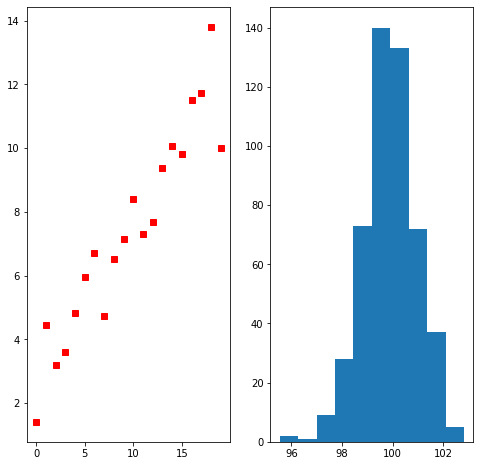

In [60]:
# Create the figure and get the two axes objects.
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,8))

# Now use ax1 to draw the first subplot. 
foo = ax1.plot(x, y, 'rs')

# Use ax2 to draw the second subplot. foo captures the text output
# so that it doesn't show up in the notebook. Try commenting out the first
# line and uncommenting the second to see what I mean.
# foo = ax2.hist(data, 10)
ax2.hist(data, 10)

## Text and symbols

You can even use fancy labels. Check out this basic plot of a sin wave that goes from 0 to 4$\pi$ on the x-axis:

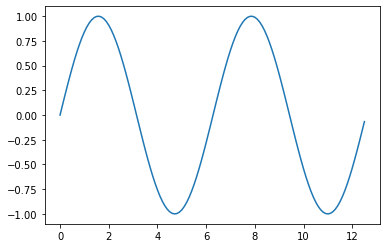

In [61]:
# Create some data.
x = np.arange(0, 4 * np.pi, 0.1)
y = np.sin(x)

# Plot the data.
plt.plot(x, y)

First, let's change the x limits so that the sin wave goes to the edge of the plot. We'll also create an array of numbers that starts at 0 and ends at 4$\pi$, and we'll use those for the ticks on the x-axis (your original plot most likely had fewer ticks on that axis).

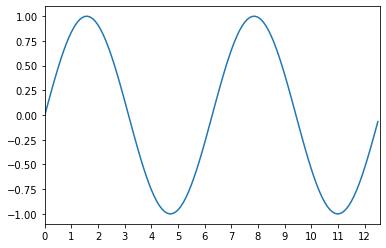

In [62]:
# Plot the data.
plt.plot(x, y)

# Change the x-axis limits.
plt.xlim(0, np.pi * 4)

# Change the ticks for the x-axis so they don't skip numbers.
# First create an array of numbers from 0 to 4*pi.
numbers = np.arange(0, 4 * np.pi)

# Now tell the plot to use those tocks on the x-axis.
ticks = plt.xticks(numbers)

You can also pass an array of labels to go with your ticks, and it will use those instead of the numbers. We want to include the $\pi$ symbol, which you can do using TeX markup (see [this page](http://matplotlib.org/users/mathtext.html)) -- just make sure you prefix the label strings with `r` to turn them into raw strings.

This time you'll use ticks from 0 to 4$\pi$ that increment by $\frac{1}{2}\pi$ instead of by 1. You don't have to understand exactly how this works unless you want to. Mostly I wanted to show you that it could be done, in case ever *do* want to do it. But here's an explanation of one of the labels:

The TeX markup starts and ends with `$`, so that's why it's the first and last symbol in each label string. You can create a fraction with `\frac{numerator}{denominator}`, so `r'$\frac{1}{2}$'` becomes $\frac{1}{2}$. You can include the $\pi$ symbol with `\pi`, so `r'$\frac{1}{2}\pi$'` becomes $\frac{1}{2}\pi$. If you wanted, you could put $\pi$ in the numerator like `r'$\frac{\pi}{2}$'`, which would become $\frac{\pi}{2}$. (In fact, if you double-click this cell to see my markdown text, you'll see that I added these symbols using TeX format here!).

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (9).

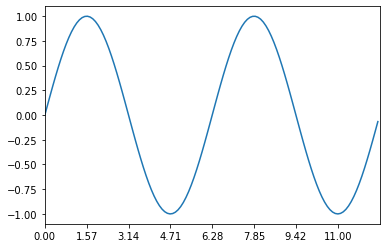

In [67]:
# Create ticks from 0 to 4*pi, at every 1/2 pi interval.
numbers = np.arange(0, 4 * np.pi, np.pi / 2)

# Create labels corresponding to the ticks using TeX markup.
labels = ['0', r'$\frac{1}{2}\pi$', r'$\pi$', 
          r'$\frac{3}{2}\pi$', r'$2\pi$', r'$\frac{5}{2}\pi$', 
          r'$3\pi$', r'$\frac{7}{2}\pi$', r'$4\pi$']

# Plot the data.
plt.plot(x, y)

# Change the x-axis limits.
plt.xlim(0, np.pi * 4)

# Add the custom x-axis ticks and labels.
ticks = plt.xticks(numbers, labels)

## Using with GIS attribute tables

There's nothing stopping you from plotting data from attribute tables. You just need to read it in. For example, let's read in the POPLASTEST and POPLASTCEN fields from Municaplities.shp.

In [64]:
import arcpy

# Create empty lists to hold the data
estimate = []
census = []

# Create a search cursor that will read the two attributes we're interested in
with arcpy.da.SearchCursor('Municipalities.shp', ['POPLASTEST', 'POPLASTCEN']) as searcher:
    
    # Loop through the rows in the search cursor
    for row in searcher:
        
        # Append the first value in the row (POPLASTEST) to the estimate variable
        estimate.append(row[0])
        
        # Append the second value in the row (POPLASTCEN) to the census variable
        census.append(row[1])

Now you can plot the POPLASTEST field against the POPLASTCEN field:

Text(0, 0.5, 'Estimated population')

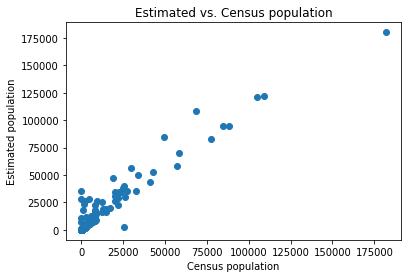

In [65]:
# Plot the data.
plt.plot(census, estimate, 'o')

# Add titles.
plt.title('Estimated vs. Census population')
plt.xlabel('Census population')
plt.ylabel('Estimated population')

Want to see a much slicker way to read that data into the `census` and `estimate` variables? This uses the `zip()` function to automatically loop over the cursor and separate out the two columns. I didn't show it to you first because I wanted to make sure you understood what was happening, and the other code is much more explicit about that.

Text(0, 0.5, 'Estimated population')

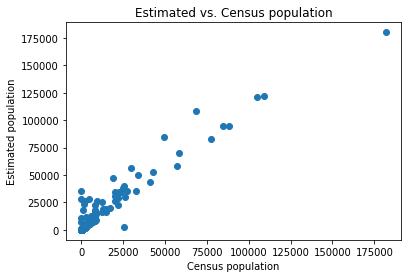

In [66]:
# Read the data from the shapefile.
estimate, census = zip(*arcpy.da.SearchCursor('Municipalities.shp', ['POPLASTEST', 'POPLASTCEN']))

# Plot the data.
plt.plot(census, estimate, 'o')

# Add titles.
plt.title('Estimated vs. Census population')
plt.xlabel('Census population')
plt.ylabel('Estimated population')

Want to know more?
------------------
Matplotlib is very powerful and there are lots of functions and arugments to create different kinds of figures and modify them as much as you would like.
Check out the [website](http://matplotlib.org/), [beginner's guide](http://matplotlib.org/users/beginner.html), or the [gallery](http://matplotlib.org/gallery.html) to learn more.